# Chapter 2 - Reflection exercises
## Oplossingen

# Ex 1

In [1]:
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns      

In [2]:
ais = pd.read_csv('../data/ais.csv')
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


## Measures

In [7]:
ais['bmi'].mode()

0    21.86
1    23.58
Name: bmi, dtype: float64

In [21]:
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {ais['wt'].mean()}")
print(f"Standard deviation:  {ais['wt'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {ais['wt'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {ais['wt'].skew()}")
print(f"Kurtosis:            {ais['wt'].kurtosis()}")

# Median & co
print(f"Minimum:   {ais['wt'].min()}")
print(f"Median:    {ais['wt'].median()}")
print(f"Maximum:   {ais['wt'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", ais['wt'].quantile(percentiles))
print("Inter Quartile Range:", ais['wt'].quantile(.75) - ais['wt'].quantile(.25))
print(f"Range :    {ais['wt'].max() - ais['wt'].min()}")

Mean:                75.0079207920792
Standard deviation:  13.925199486183791
Variance:            193.91118073001334
Skewness:            0.2424090729770724
Kurtosis:            0.4256300226639298
Minimum:   37.8
Median:    74.4
Maximum:   123.2
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00     37.800
0.25     66.525
0.50     74.400
0.75     84.125
1.00    123.200
Name: wt, dtype: float64
Inter Quartile Range: 17.599999999999994
Range :    85.4


## Graphs

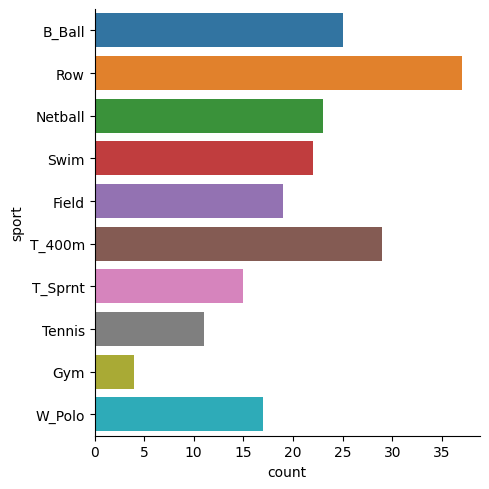

In [4]:
sns.catplot(data = ais, kind = "count", y = "sport")

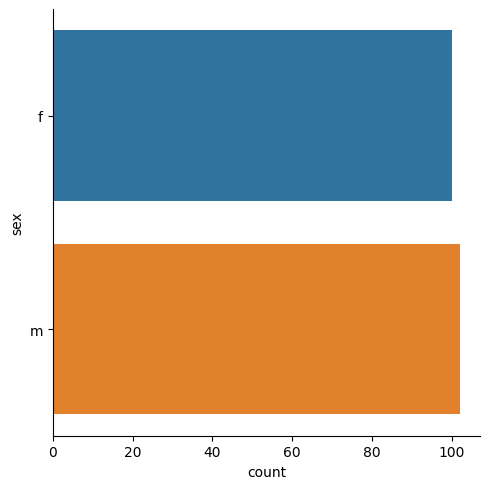

In [5]:
sns.catplot(data=ais, kind='count', y='sex')

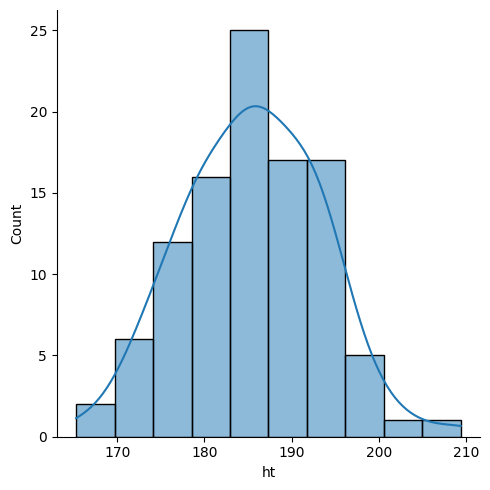

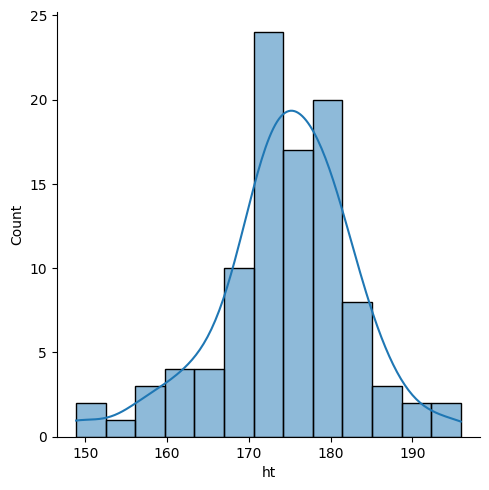

In [20]:
sns.displot(x=ais[ais['sex'] == 'm']['ht'], kde=True )
sns.displot(x=ais[ais['sex'] == 'f']['ht'], kde=True )

## Ex 2

In [22]:
x = [2, 1, 2, 0, 2, 4, 9, 11, 13, 8, 8]

In [40]:
# Variance of a sample
def sample_var(x):
    mean = 0
    n = 0
    for i, number in enumerate(x):
        mean += i*number
        n += number 
    mean /= n
    print('n: ', n)
    print('mean: ', mean)

    sum = 0
    for i, number in enumerate(x):
        for _ in range(number):
            sum += (i - mean) ** 2

    var = 1/(n-1) * sum
    print('var: ', var)
    return var
    # return 1/(n-1) * sum((x - mean) ** 2)

# Standard deviation of the sample
def sample_sd(x):
    return np.sqrt(sample_var(x))

print('std div: ', sample_sd(x))

n:  60
mean:  7.0
var:  5.830508474576271
std div:  2.4146445855604237


## Ex 3

In [49]:
X = np.array([4, 4, -4, -4])
Y = np.array([7, 1, -6, -2])

In [59]:
def s1(x):
    n = len(x)
    mean = sum(x) / n
    var = 1/(n-1) * sum((mean - x))
    return np.sqrt(var)

def s2(x):
    n = len(x)
    mean = sum(x) / n
    var = 1/(n-1) * sum(np.abs(mean - x))
    return np.sqrt(var)

def s3(x):
    n = len(x)
    mean = sum(x) / n
    var = 1/(n-1) * sum((mean - x) ** 2)
    return np.sqrt(var)

In [65]:
print("S1", '-'*20)
print('X: ', s1(X))
print('Y: ',s1(Y))
print("S2", '-'*20)
print('X: ',s2(X))
print('Y: ',s2(Y))
print("S3", '-'*20)
print('X: ',s3(X))
print('Y: ',s3(Y))

S1 --------------------
X:  0.0
Y:  0.0
S2 --------------------
X:  2.309401076758503
Y:  2.309401076758503
S3 --------------------
X:  4.618802153517006
Y:  5.477225575051661


## Ex 4